<a href="https://colab.research.google.com/github/dataqueenpend/Projects-/blob/Kaggle-Projects/House_Prices_Competition_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Prices Competition - Advaned Regression

Ok, so after the failure with implementation of kfolds on the House Prices dataset (on my side). I've decided to start one more time from the beggining. 

This time, I'll follow the recommended tutorials on Kaggle, and I hope it will go better than the last time 😃.

> What we'll have on the menu? 



##1. [Basic Data Exploration]('https://www.kaggle.com/dansbecker/basic-data-exploration') - pandas basic exploration of the data 

In [1]:
#Loading library
import pandas as pd

In [2]:
#Loading data set
df = pd.read_csv('/content/train.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* 81 columns (including id - which we'll store probably as an index). 
* 1460 entries (rows)
* both numerical and categorical columns

* also we can see out target colums - SalePrice, which is the last one of the bunch

* we have some missing data - we'll need to deal with it
---

Ok. Some we took the first look at the data. Now, maybe we'll try some statistics?

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


And finally let's check out, how our dataset is looking. 


Maybe ten first entries?

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

We have plenty of columns here. But if every column has an impact on the target variable? 

We'll probably find out later :)

##2. Exploratory Data Analysis - let's dive deeper into the data!

In my EDA of House Prices dataset I'll be working with the tutorials from two notebooks:
* [Comprehensive data exploration with Python]('https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python') by Pedro Marcelino - which provided to Kaggle learners step by step guide on performing EDA
* [House Prices EDA]('https://www.kaggle.com/dgawlik/house-prices-eda') by Dominik Gawlik - which told us in his EDA about really interesting findings in this dataset

Pedro wrapped the EDA in really essential couple of steps:
> 1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.'

I encourage you to take a look at Pedro data exploration notebook. He clearly explains how to go through analysing new dataset step by step.

In order to properly perform the EDA, we need to take a look at out target variable - SalePrice, and all the other variables of this dataset, to make better understand our data and see what we can conclude from it. 

Time to get serious! 



In [6]:

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


For now only those couple of libraries. We'll see how it will go later. 

Let's check out more info about columns. I've checked the data [description]('https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data') and it seems that all columns are in the correct data types. 

So, basic cleaning of the data, was covered by the amazing  Dean De Cock - who compiled the [Ames housing dataset]('http://jse.amstat.org/v19n3/decock.pdf'). And we don't need to do it by ourselves. Thank you Dean! 

---



Let's take a closer look at the columns. 

How many of them store numerical values and how many are categorical?

In [7]:
#Creating lists of categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype in ['int', 'float']]


In [8]:
#Removing Id and SalePrice (target column) from num_cols
num_cols.remove('SalePrice')
num_cols.remove('Id')

In [9]:
all_cols = df[num_cols+cat_cols]

In [10]:
print(all_cols.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [11]:
len(cat_cols)

43

In [12]:
len(num_cols)

36

In [13]:
#Let's take a look at the categorical column names

print('Categorical columns: ')
print(cat_cols)

Categorical columns: 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [14]:
#And the numerical ones

print('Numerical columns: ')
print(num_cols)

Numerical columns: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Next -> Missing values!

How many are those in the dataset?

In [15]:
miss_val = df.isnull().sum()
miss_val = miss_val[miss_val > 0].sort_values(ascending = False)
print(miss_val)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [16]:
len(miss_val)

19

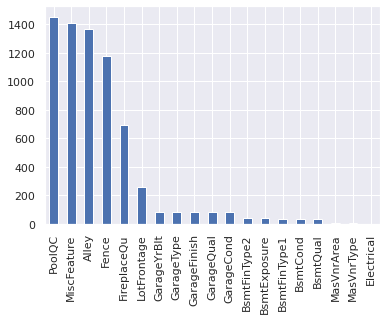

In [17]:
miss_val.plot(kind='bar')

* 19 columns with missing data. 
* 5 columns with missing above or close to 50% of the data. 

But these columns are categorical, and it seems like that NaN's are connected to missing feature, which was sampled. 

---

And now we'll be doing something that we'll be a life changer (for me). 

Amazing **Dominik** - creator of the notebook we are following - examined the distribution of the Sale Price column. And led us to really interesting thoughts...

In [18]:
import scipy.stats as st

In [19]:
#Storing out target variable as an y
y = df['SalePrice']

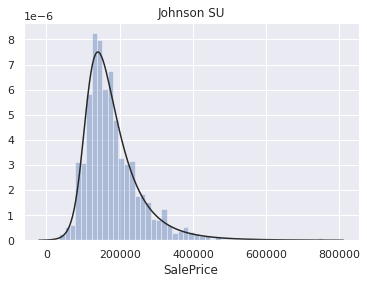

In [20]:
#Checking the distribution of the Sale Price 
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)


I'm not familiar with Johnson SU distibution. But from the first look it seems like some universal distribution to fit 'them all'. More on Johhnson SU distribution [here]('https://www.youtube.com/watch?v=fg0DxUqccw8'). 

I'll definetly will be checking it out more thoroughly when I'll start my khan statistics course. 

---

Back to the subject though!

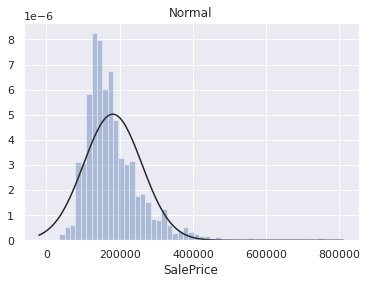

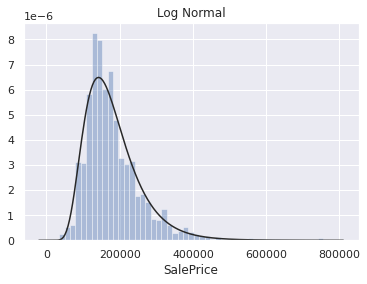

In [21]:
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

We can see from above the Sale Price does not follow normal distribution. 

And... From **Dominik** notebook I know now, that regression cannot be implemented here before some transformation. 

What do we know about SalePrice also?

* Have positive skewness.
  > Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode. The mode marks the response value on the x-axis that occurs with the highest probability. A distribution is skewed if the tail on one side of the mode is fatter or longer than on the other: it is asymmetrical.
* Show peakedness.
  > Kurtosis is a measure of the peakedness of a distribution, or in other words how 'heavy-tailed' or 'light-tailed' the data is relative to a normal distribution.


  



In [22]:
print('Skewness: %f' %df['SalePrice'].skew())
print('Kurtosis: %f' %df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Ok, so we now a little about SalePrice . Let's take a closer look at indepedent variables. 

---

###Numerical variables

**Dominik** prove to us, that the same protocol we'll have to perform with numerical variables in this dataset. 

In [23]:
test_normality = lambda x: st.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[num_cols])
normal = normal.apply(test_normality)
print(not normal.any())

False


In the above code we're testing if any of the numerical variables follows the normal distribution. As we see, answear is no. 


In order to perform regression, they also need to be transformed. 


We can take a look at the specifics of the distibution in each numerical variable in the dataset, by plotting distplots and compiling them in a [FacetGrid]('https://seaborn.pydata.org/generated/seaborn.FacetGrid.html'). 

**Doing plots in with unpivoted columns and FacetGrid, we can avoid creating a loop :).**

More on visualizing variables (both numerical and categorical) with easy an elegant way you can find in [this article]('https://towardsdatascience.com/how-to-enhance-your-visualizations-for-exploratory-data-analysis-using-seaborn-and-facetgrid-15d9d0251b5c').

In [24]:
#Converting dataframe from wide-from to long-form, 
#unpivots all the indices listed in value_vars and creates two columns in this instance, variable and value, 
#the former with the column indices as now values in the variable column and the latter the original values.
data = pd.melt(df, value_vars=num_cols)

In [25]:
data.head()

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


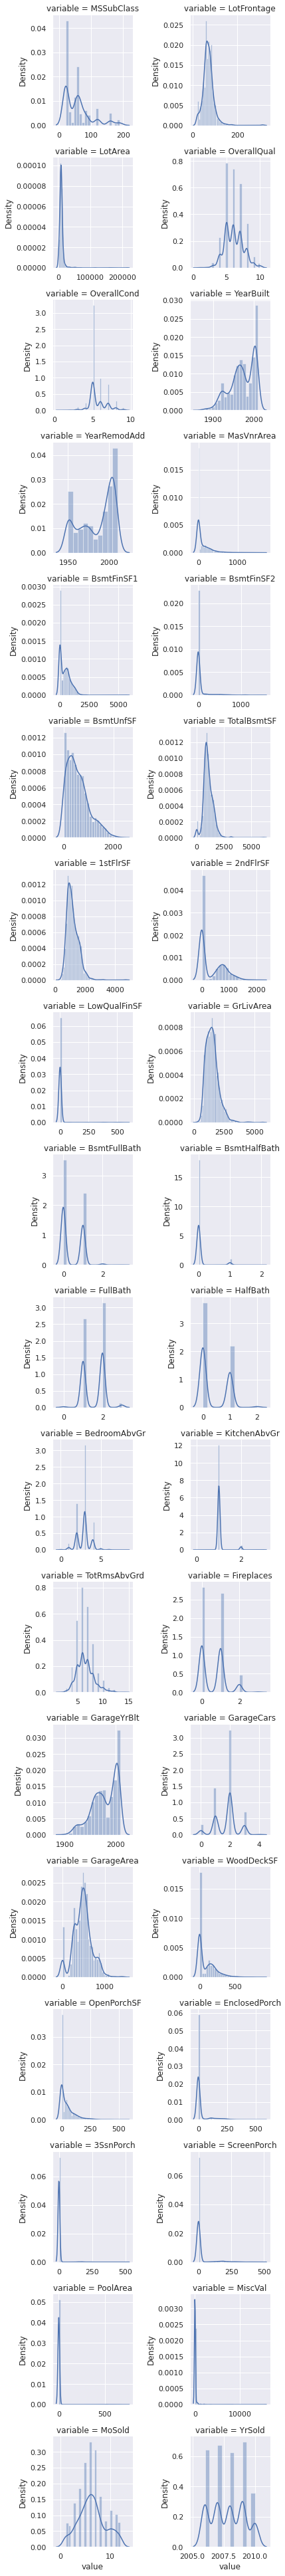

In [26]:
#'Since we only have one row in this instance, we can use the parameter col_wrap'
#We want one plot for each numerical columns, so we set sharex, sharey to False

plots = sns.FacetGrid(data, col='variable', col_wrap=2, sharex=False, sharey=False)
plots = plots.map(sns.distplot, 'value')

> 'When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.'

more [here]('https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9').


###Catgorical variables

Let's take a closer look at categorical variables. We'll visualize the distribution of each labal in every independent variable by using countplot. 

Sources: 
* [How to Perform Exploratory Data Analysis with Seaborn]('https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d')
* [A Complete Guide to Plotting Categorical Variables with Seaborn]('https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec')
* [Clearing the confusion once and for all: fig, ax = plt.subplots()]('https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca')








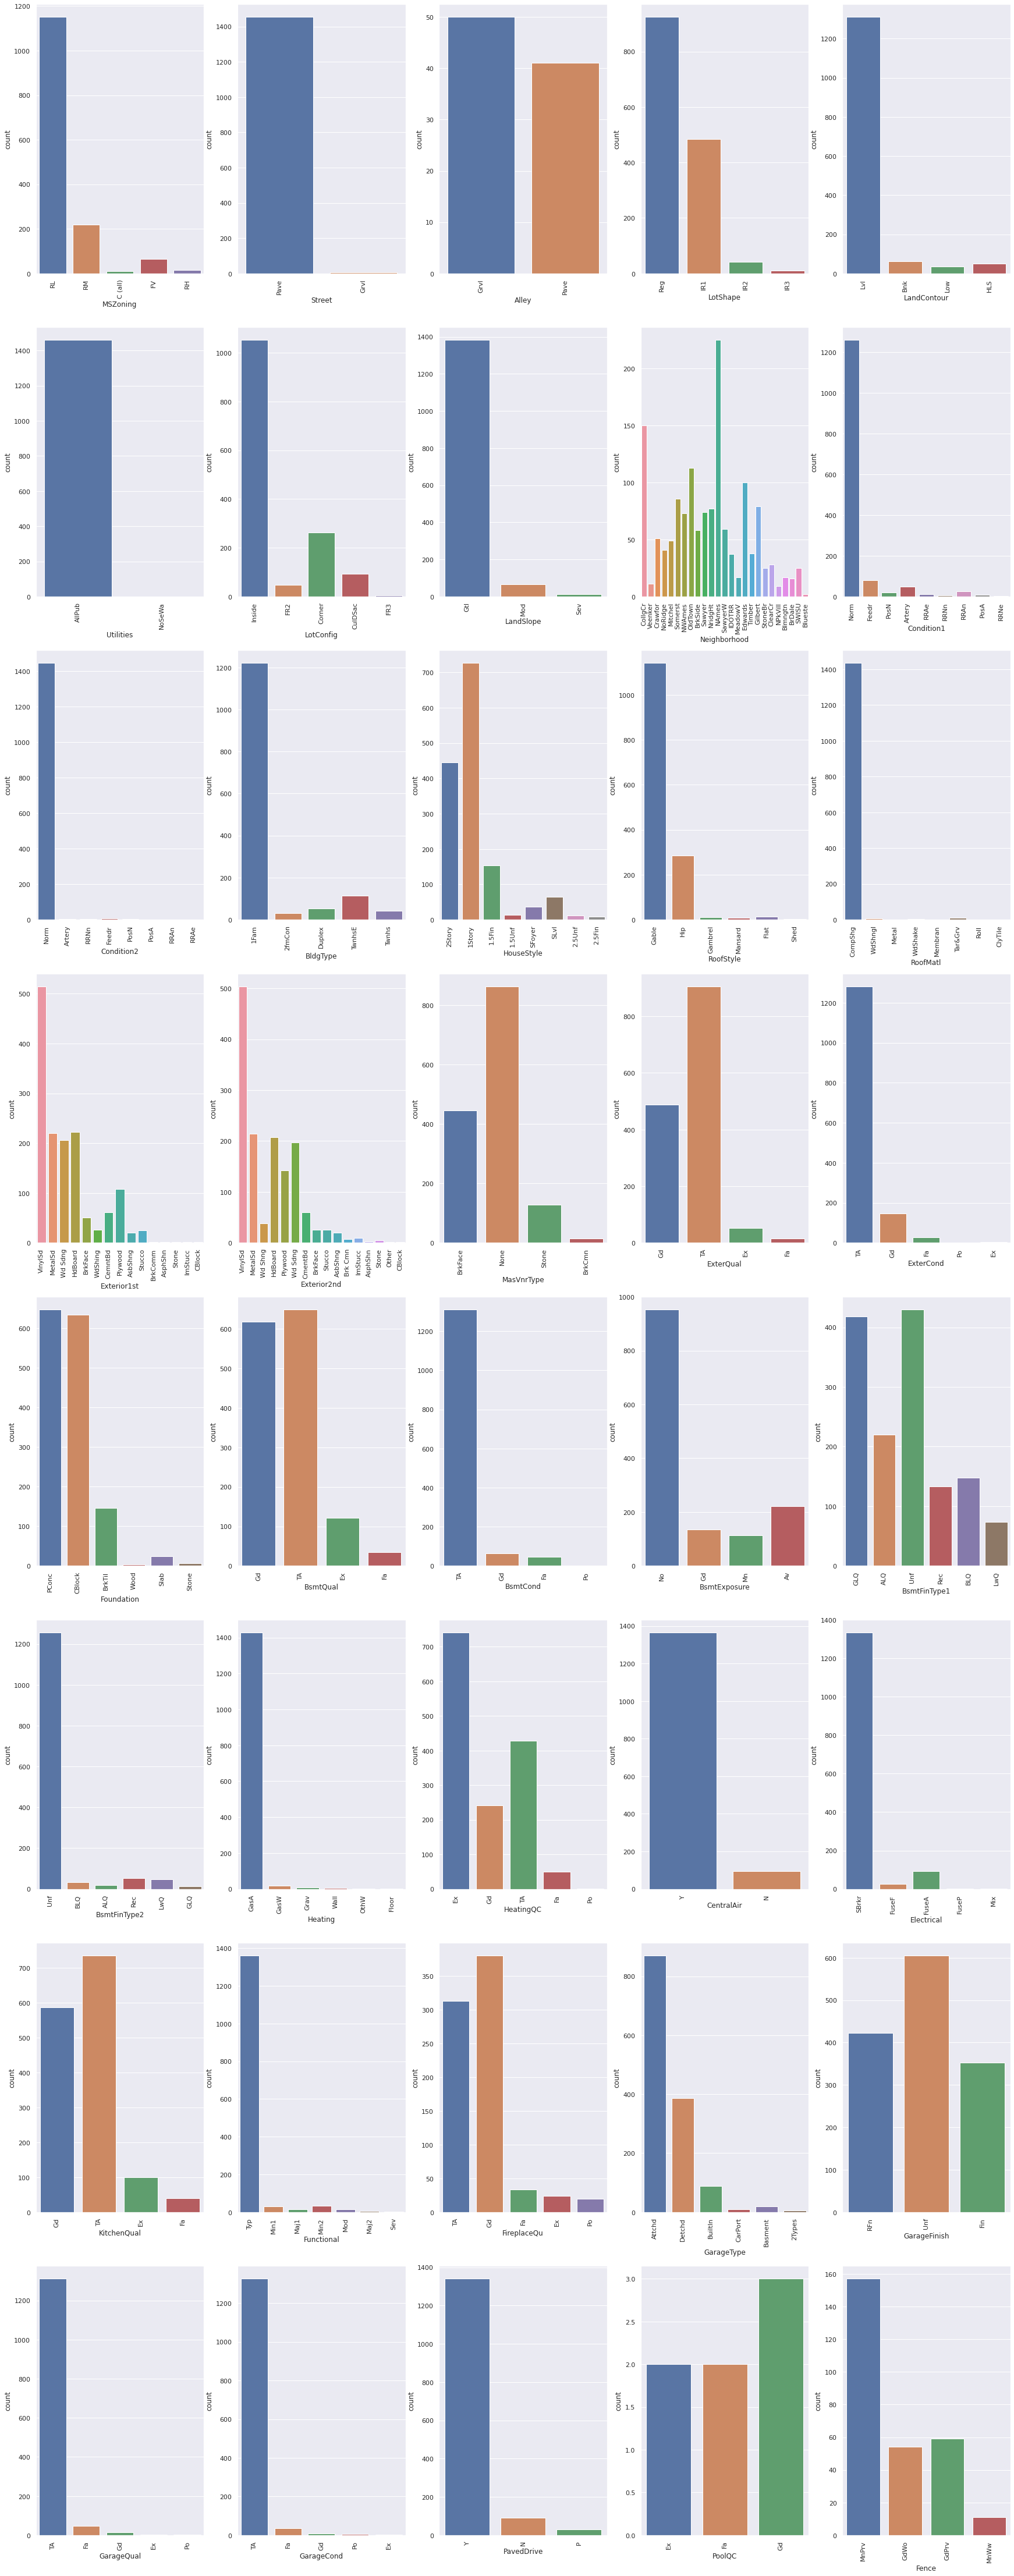

In [27]:
fig, ax = plt.subplots(8,5, figsize=(30,80))
for variable, subplot in zip(cat_cols, ax.flatten()):
  sns.countplot(df[variable], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

We can spot distribution of each label differentiate depending on the category. In some categories one label is dominating the count (GarageQual,GarageCond, PavedDrive etc), and in some we have more evenly distibuted labels (GarageFinish, BsmtFinType1, Alley, Neighborhood etc).

###Correlations between independent variables and target variable SalePrice


I don't see so much use in picking independent variables randomly to check the correlations between them and the dependent variable y (correct me if I'm missing something). 

Because of that, I'll go straight to the analysis of the correlation in the dataset using heatmap. 

In the **Comprehensive Data Exploration with Python** we can learn how to perform EDA to detect correlations of variables in our 'plasma soup' of data in the most objective way:

> 'To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).'


If you want to know about correlations and heatmaps go here:
* [Seaborn heatmap | How to make a heatmap in Python Seaborn and adjust the heatmap style]('https://www.youtube.com/watch?v=0U9cs2V-Mqc')
* [Statistics- What is Pearson Correlation Coefficient? Difference between Correlation and Covariance]('https://www.youtube.com/watch?v=6fUYt1alA1U&t=1s')
* [NumPy, SciPy, and Pandas: Correlation With Python]('https://realpython.com/numpy-scipy-pandas-correlation-python/#pearson-correlation-coefficient')


In [28]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

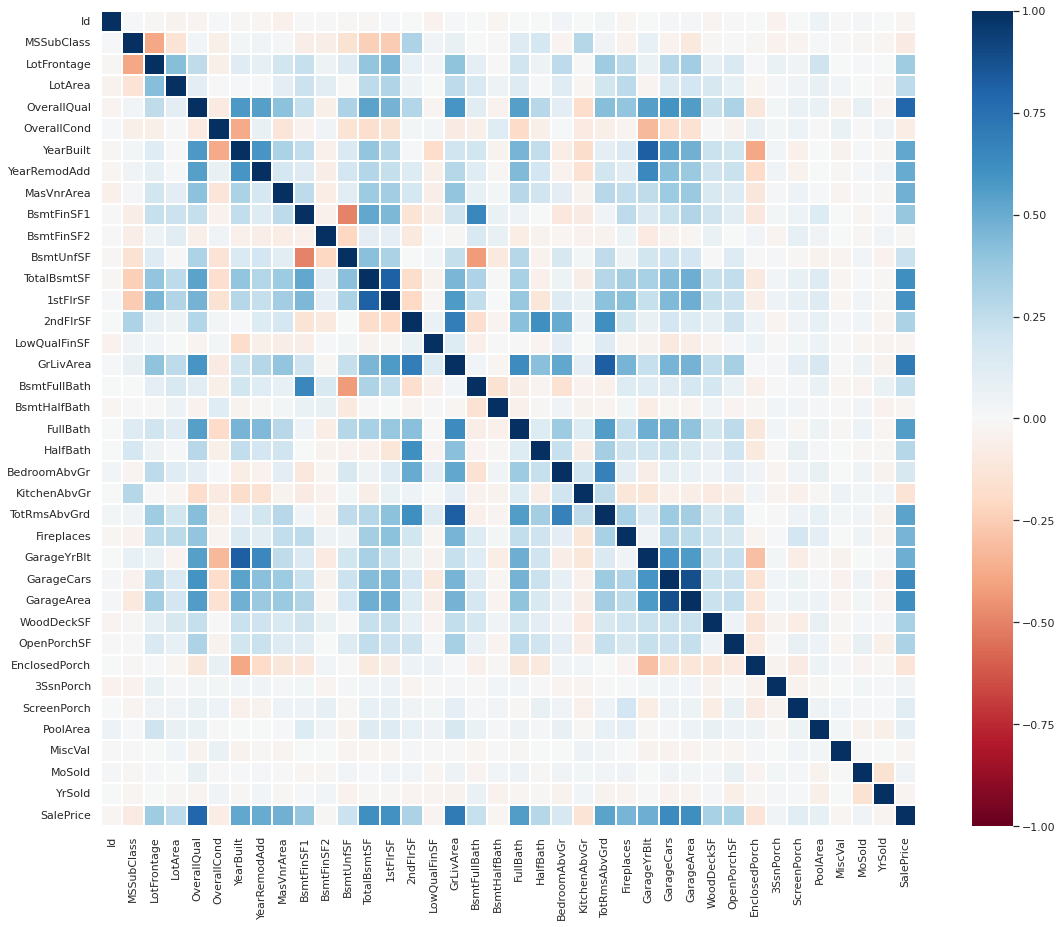

In [29]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='RdBu', linewidth=1)

Variables with *POSITIVE CORRELLATION* to **SalePrice**: 
* **OverallQual**
* **GrLivArea**
* **GarageCars**
* **GarageArea**

With the heatmap we can see also stron positive correlations with between other variables (including also the obvious ones):
* 1stFlrSF - TotalBsmtSF
* GrLivArea - TotRmsAbvGrd
* GarageArea - GarageCars
* YearBuilt - GarageYrBlt

In [30]:
#10 variables with the largest positive correlation to the SalePrice
k= 10
larg = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [31]:
#Selection of 10 columns 
df[larg]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999
1456,210000,6,2073,2,500,1542,2073,2,7,1978
1457,266500,7,2340,1,252,1152,1188,2,9,1941
1458,142125,5,1078,1,240,1078,1078,1,5,1950


In [32]:
#Values of selected columns
df[larg].values

array([[208500,      7,   1710, ...,      2,      8,   2003],
       [181500,      6,   1262, ...,      2,      6,   1976],
       [223500,      7,   1786, ...,      2,      6,   2001],
       ...,
       [266500,      7,   2340, ...,      2,      9,   1941],
       [142125,      5,   1078, ...,      1,      5,   1950],
       [147500,      5,   1256, ...,      1,      6,   1965]])

In [33]:
#Transposed values of the selected columns - rows are columns, columns are rows
df[larg].values.T

array([[208500, 181500, 223500, ..., 266500, 142125, 147500],
       [     7,      6,      7, ...,      7,      5,      5],
       [  1710,   1262,   1786, ...,   2340,   1078,   1256],
       ...,
       [     2,      2,      2, ...,      2,      1,      1],
       [     8,      6,      6, ...,      9,      5,      6],
       [  2003,   1976,   2001, ...,   1941,   1950,   1965]])

In [34]:
#Correlations values
corrval = np.corrcoef(df[larg].values.T)

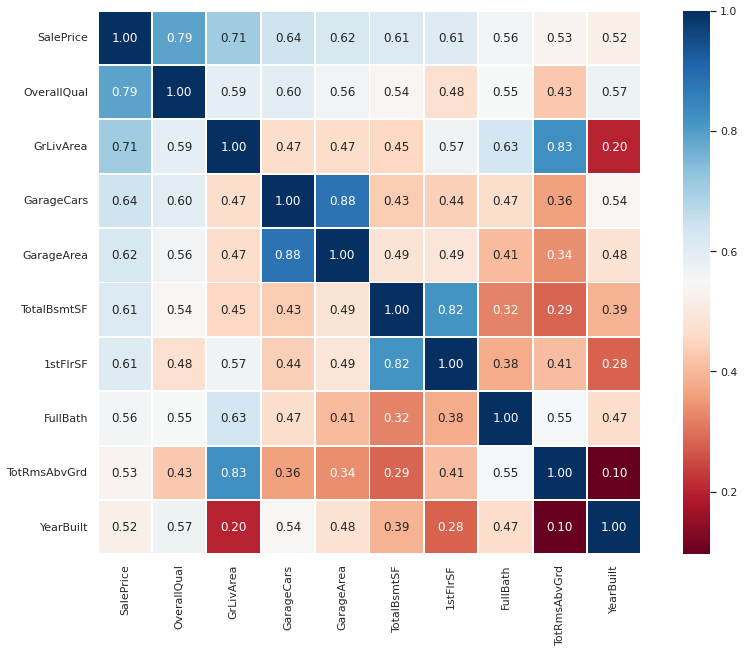

In [35]:
#Creating zommed in heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrval, annot=True, fmt='.2f', square=True, cmap='RdBu', linewidth=1, yticklabels=larg.values, xticklabels=larg.values)

###Conclusion
Strongly correlated to SalePrice:
* OverallQual
* GrLivArea (Above ground living area square feet)
* TotalBsmtSF	(Total square feet of basement area)

Duplicated (sort of) variables:
* GrLivArea - 1stFlrSF
* GarageCars - GarageArea

TotRmsAbvGrd - number of rooms in the house has definetly some impact on the house price. But if it is large enough?

Same goes to FullBath (number of bathrooms). And YearBuilt. 

---
####Paiplots - let's see more about correlations!

Let's further inspect the correlations of our selected variables with seaborn paiplots. 

More info about pairplots you can find here:
* [Seaborn pairplot | How to make a pairplot in Python and the Seaborn pairplot interpretation]('https://www.youtube.com/watch?v=uCgvlfIo9fg')



In [36]:
#Updating our columns selection
nice_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt']

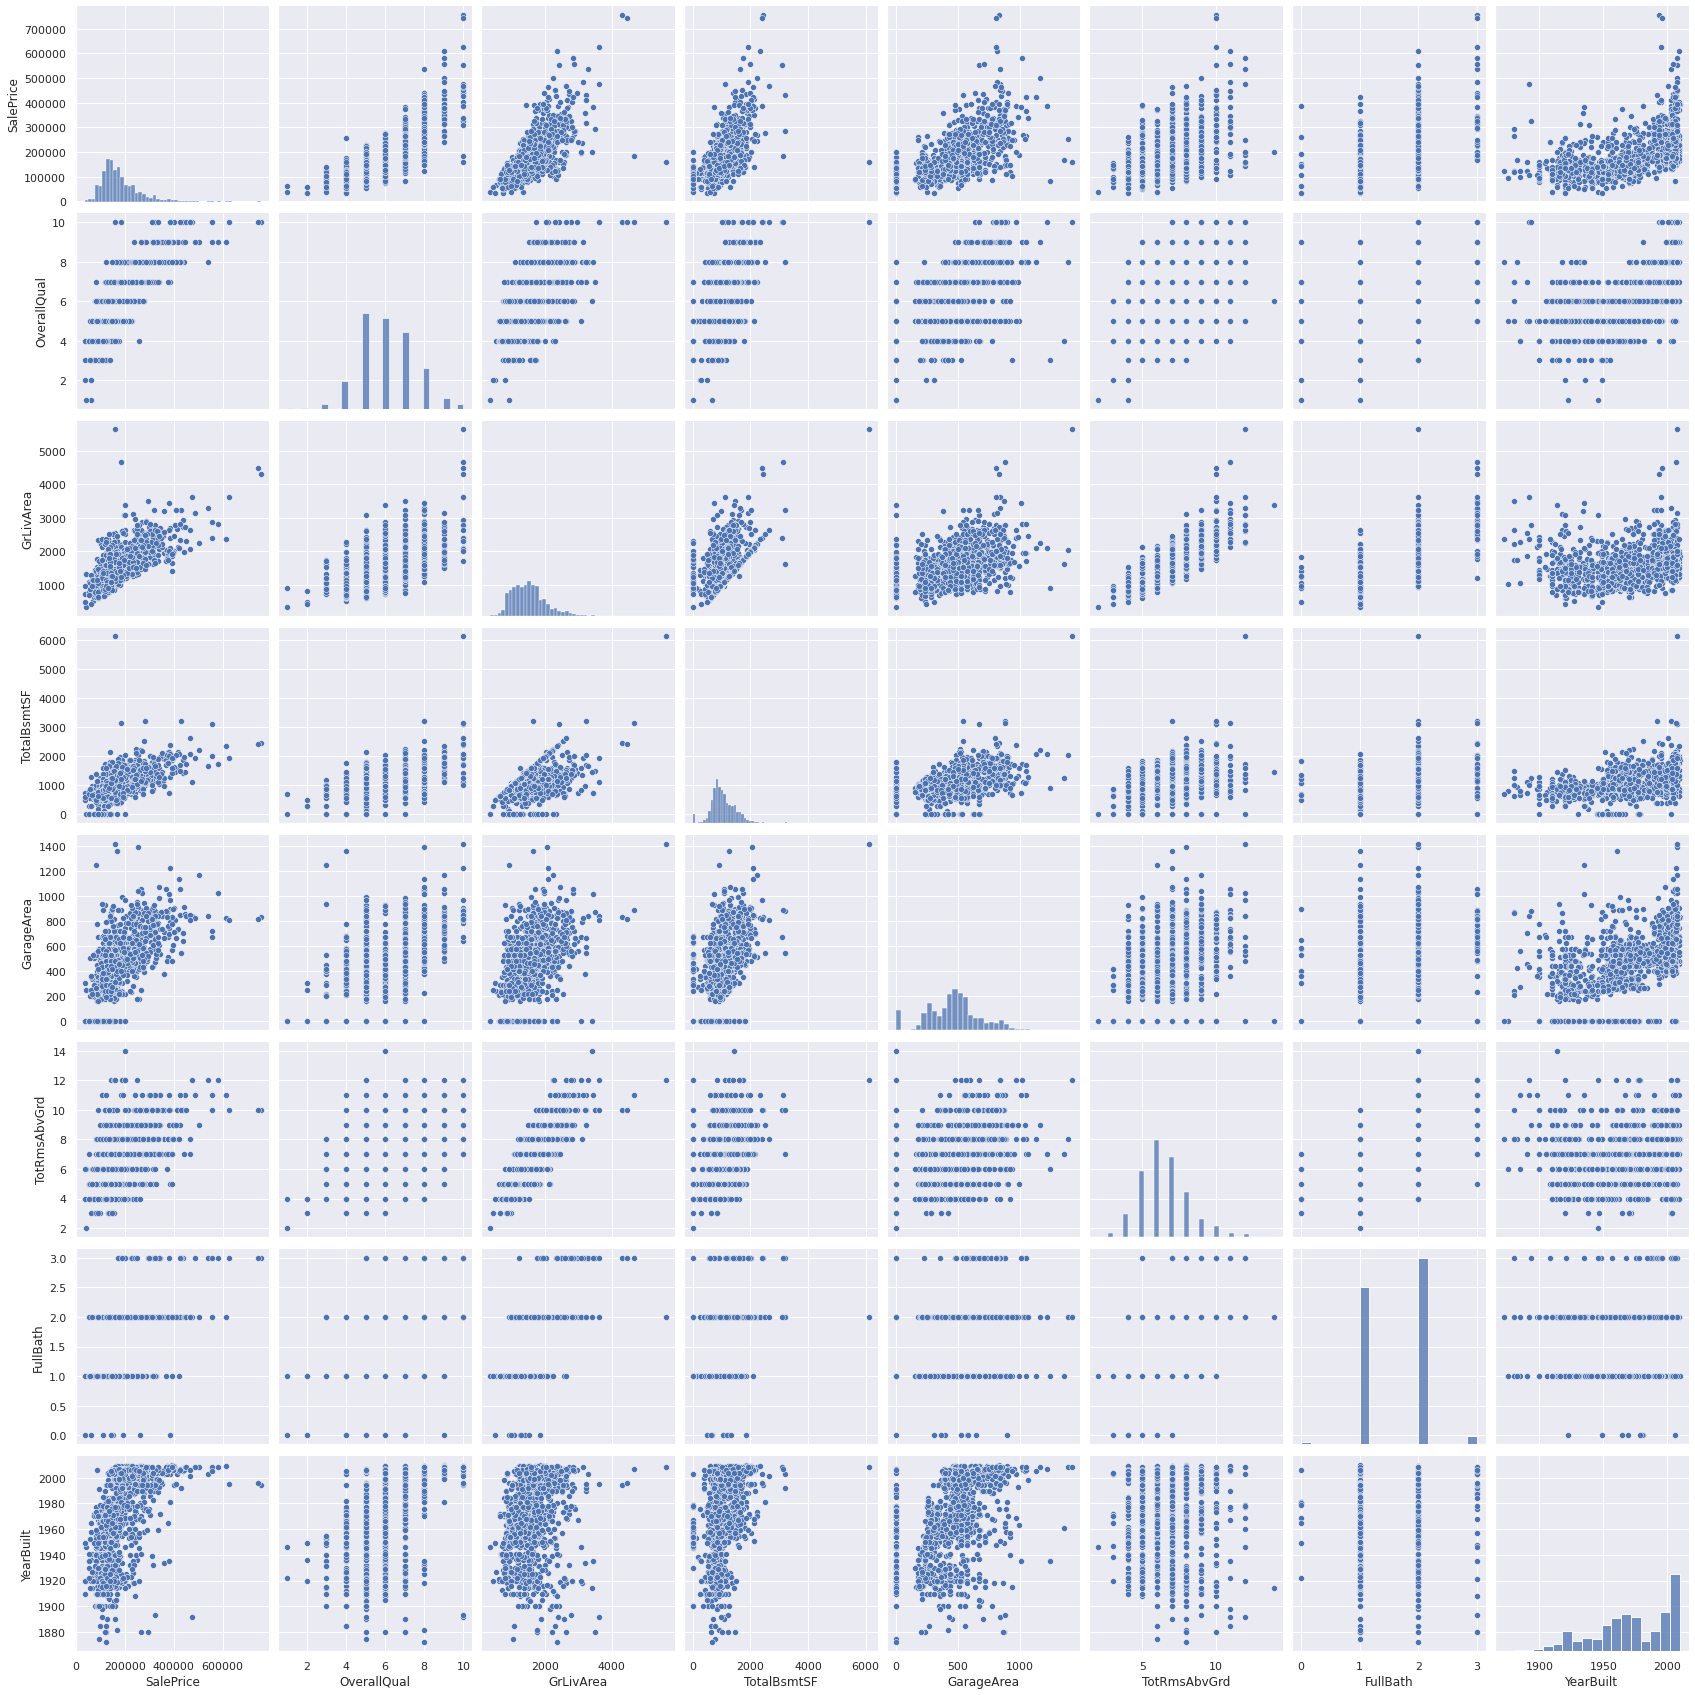

In [37]:
sns.pairplot(df[nice_cols], size=3)

This seems really interesting. 

Thanks to the paiplots we can see how the disibution looks in correlations with each of our selected variables. 

I'll not go into details here. But just point out the most interesting realations. 
* SalePrice - YearBuilt -> seems like SalePrice is growing faster in the years from 2000 (even exponentially growth?)
* GrLivArea - TotRmsAbvGrd -> linear regression but it is rather obvious one, house area grows when there are more rooms in the house
* SalePrice - GarageArea, TotalBsmtSDS, GrLivArea -> linear growth
* TotalBsmtSF - GrLivArea -> really neat and sharp straight line growth

###Missing data

After my previous studies on this dataset I spotted some valuable missing data patterns. But I'll show you what I have in mind. 


First thing first, in some variables almost all entries are NaN's.
Second, in categorical variables there are also many NaN's, but if we take a look closer at the variables, it seems that NaN's are just information about a house missing some feature. 


So my guess is that these values in categorical variables are not typical NaN's and they should be imputed for '0' or some other string/value to not cause any trouble. 

In this notebook I'll implement some nice tricks from [Pedro Marcelino EDA Notebook]('https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python'). 

In [38]:
#Summing, sorting missing data across all columns in the dataset
miss_vals = df.isnull().sum().sort_values(ascending=False)
miss_vals


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [39]:
#Calculating percentage of missing data in each column
perc = miss_vals/1460
perc

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [40]:
#And into one df
miss_vals_tab = pd.concat([miss_vals, perc], axis=1, keys=['Total', 'Percentage'])


In [41]:
miss_vals_tab.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


As I told you earlier. Probably those NaN's doesn't stand for 'no data available', but rather 'I don't have a pool, a fence or the fireplace'. 

Pedro in his EDA tells us that we should delete all variables with missing data count about 15%. I bet this come from experience and dealing with real dataset intuition, but...

Maybe I'm lacking some knowledge in the subject, but if it is not like we are taking some valuable information to trash? Maybe some people doesn't care about the Basement or Garage quality, but on the other hand, those can be some kind of predictors of the House Price. And more of them are lacking not even these 15% :D

--- 
After some consideration I've decided to make a copy of the dataset and check, how the variables will behave later. 

In one copy, I'll drop columns according to recomendation of Pedro.
In second copy, I'll drop drop only 4 columns with the highest rate of NaN's (PoolQC, MiscFeature, Alley, Fence), and in the rest of them I'll impute NaN's with string 'No feature'.


In [42]:
df_dc = df.drop(miss_vals_tab[miss_vals_tab['Total'] >1].index, 1)
#Dropping 1 observation from Electrical columns 
df_dc = df_dc.drop(df_dc.loc[df_dc['Electrical'].isnull()].index)
df_dc.isnull().sum().max()

0

In [43]:
df_dc.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,TA,TA,Wood,732,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,2,480,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1369,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,2,636,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,859,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,2,484,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,TA,TA,BrkTil,0,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,2,468,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,851,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,1,205,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [44]:
to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df_ic = df.drop(df[to_drop], axis=1)

df_ic.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [45]:
df_ic.fillna('No feature', inplace=True)
df_ic.isnull().sum().max()

0

Ok. We've dealt with NaN's in both of our 'dealing' variations. 

But the fun is far away from over!

Let's check what, we have to deal with next :)

###Outliars!

Outliars and dealing with them is part of feature engineering and it is very important in case of understanding the dataset and (further) building the succesful model. 

Resources to help us review the concept: 
* [Engineering-All Standardization And Transformation Techniques]('https://www.youtube.com/watch?v=B3gyVWw1UBg&list=PLZoTAELRMXVPwYGE2PXD3x0bfKnR0cJjN&index=13')
* [Finding an outlier in a dataset using Python]('https://www.youtube.com/watch?v=rzR_cKnkD18')
* [How to differentiate between scaling, normalization and log transformations]('https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94')


If you need to freshen up your knowledge on outliers (or you just don't know what they are) I really recommend you to watch above Krish Naik's video. He's amazingly explaining the concept (as always!). 



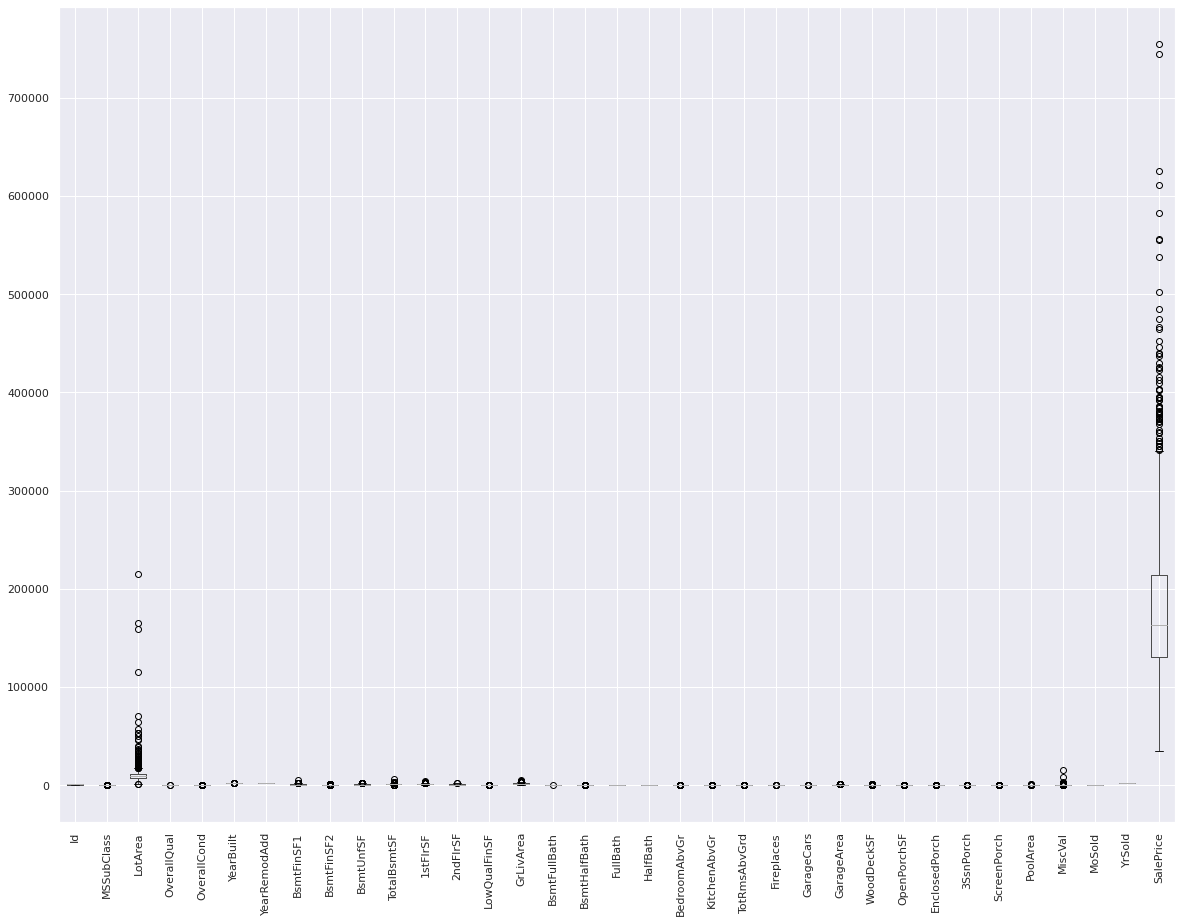

In [60]:
df_ic.boxplot(rot=90, figsize=(20,15))

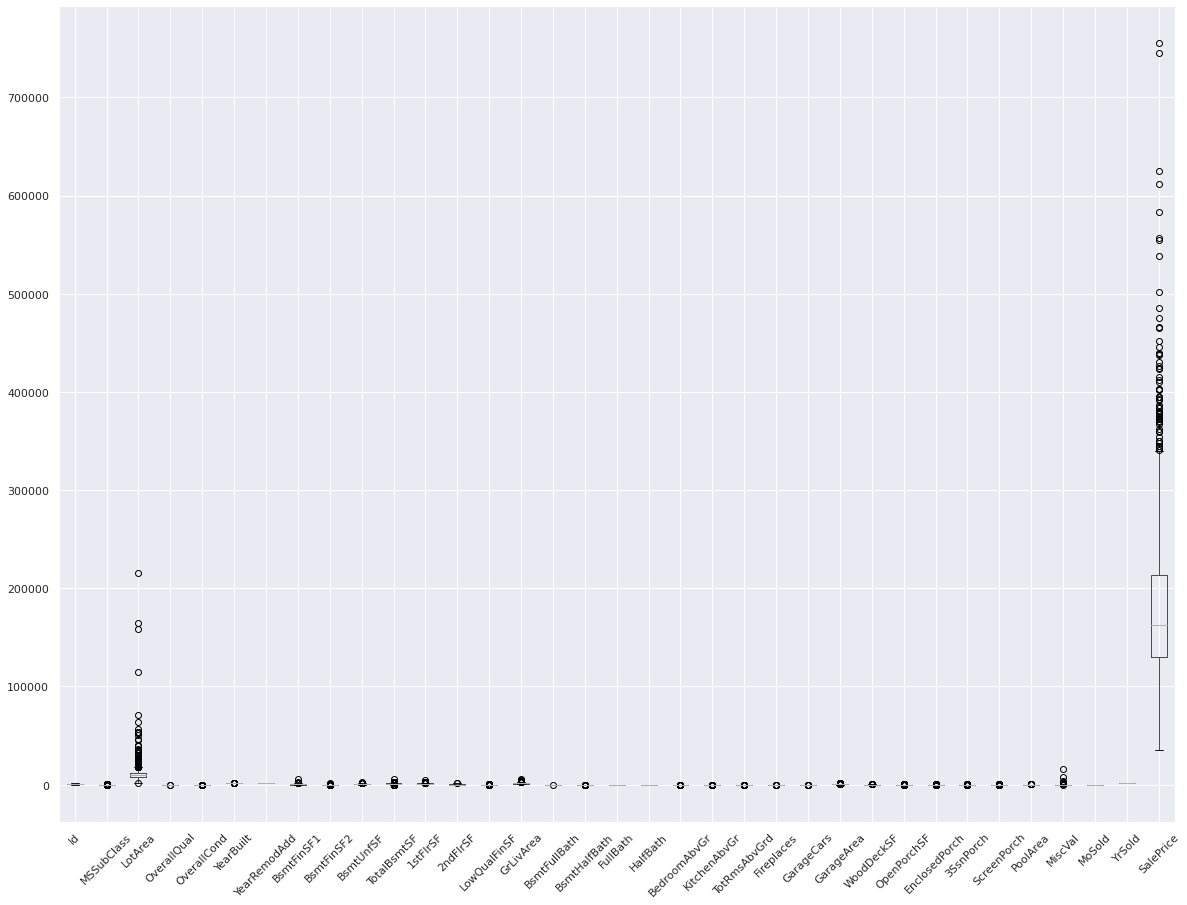

In [61]:
df_dc.boxplot(rot=45, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af953a0d0>,
      dtype=object)

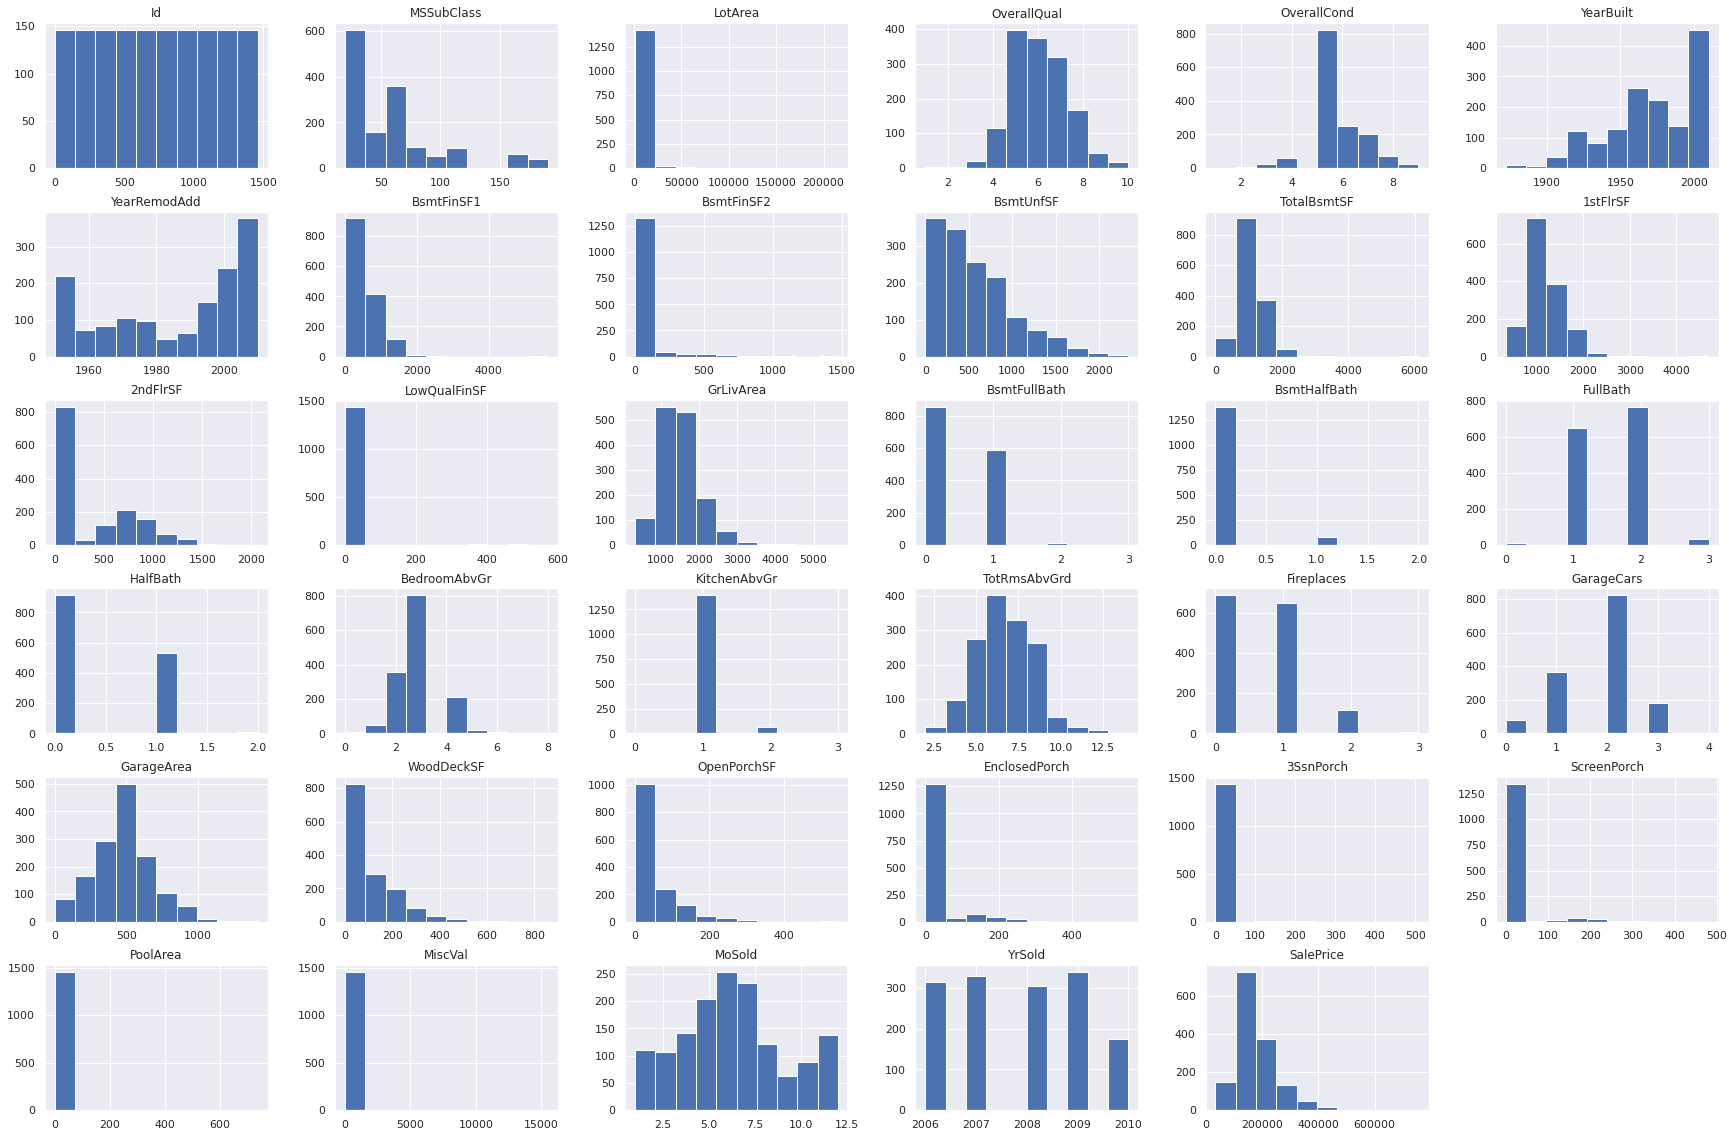

In [50]:
df_ic.hist(figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9afbd3a6d0>,
      dtype=object)

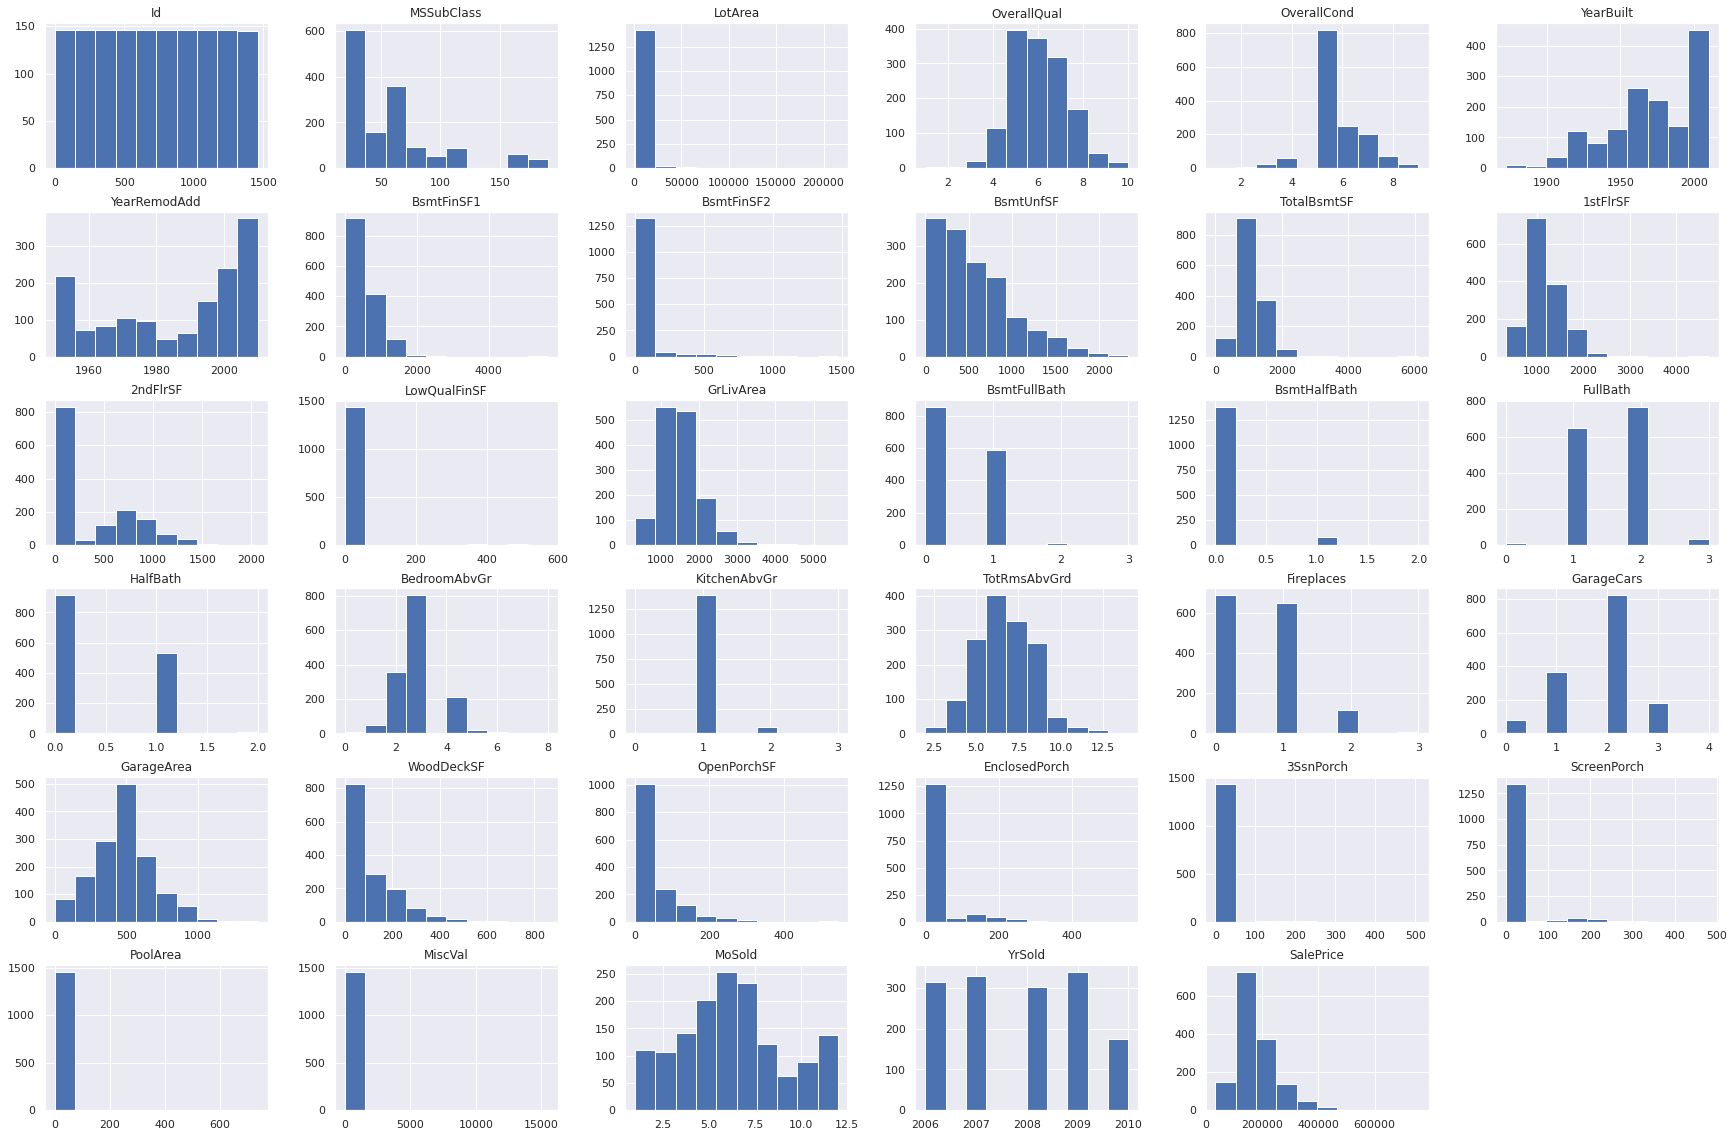

In [51]:
df_dc.hist(figsize=(30,20))

Most of the ML models to perform well, require data which follows normal distibution. Which looks like that:

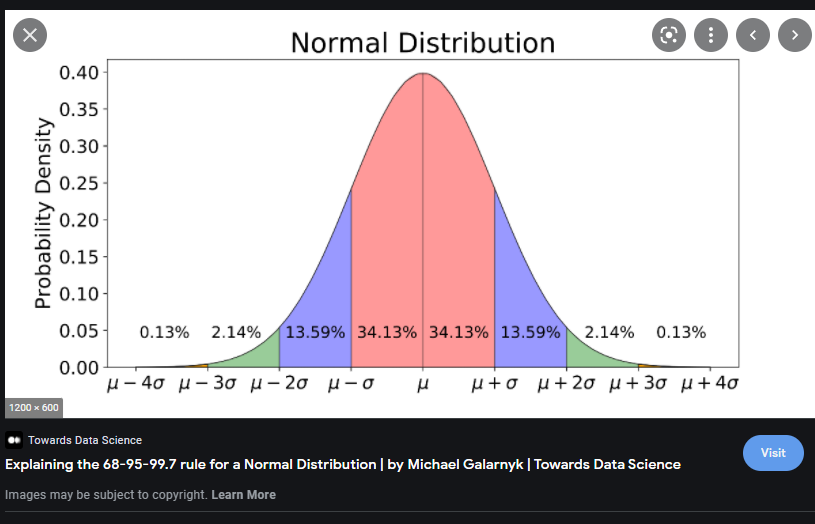

If the feature doesn't follow the normal distibution, it needs to be transformed. 

To spot to difference in the distribution of data in the dataset, we use plot boxplot on the whole dataset. We clearly see, that LotArea and SalePrice have a lot more spread than other variables. The conclusion is clearly visible: variables in the dataset have different scales.  

Next we have histograms. Let's point out which of the variables, follows the normal distribution:
* 1stFlrSF
* GrLivArea
*TotRmsAbvGrd
* Garage Area
* Sale Price

But some of the are a little right skewed and you need to use some imagination to really consider all of them as following normal distribution. 

We can see resemblance to a normal distribution also in:
* OverallQual
* TotalBsmtSF
* OverallCond
* BedroomAbvGr

Right skewed variables:
* WoodDeckSF
* OpenPorchSF
* BsmtUnfSF
* MSubClass
* BsmtFinSF1

Left skewed variables:
* YearBuilt
* YearRemodAdd

Let's check out the variance of each feature in the dataset. 

In [62]:
df_ic.var().round(2)

Id               1.777550e+05
MSSubClass       1.789340e+03
LotArea          9.962565e+07
OverallQual      1.910000e+00
OverallCond      1.240000e+00
YearBuilt        9.122200e+02
YearRemodAdd     4.262300e+02
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364200e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.700000e-01
BsmtHalfBath     6.000000e-02
FullBath         3.000000e-01
HalfBath         2.500000e-01
BedroomAbvGr     6.700000e-01
KitchenAbvGr     5.000000e-02
TotRmsAbvGrd     2.640000e+00
Fireplaces       4.200000e-01
GarageCars       5.600000e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389860e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595100e+02
ScreenPorch      3.108890e+03
PoolArea         1.614220e+03
MiscVal          2.461381e+05
MoSold           7.310000e+00
YrSold    

We see that the variance in some features are much bigger. 

> **According to the official Sklearn guide on scaling**:
> *Many elements used in the objective function of a learning algorithm assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.*

We'll implement StandardScaler() form sklearn lib on our data which follows roughly normal distribution. 

After this operation their mean will be 0, and their variance will be of value 1.

In [63]:
to_scale = ['1stFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','SalePrice', 'OverallQual','TotalBsmtSF','OverallCond','BedroomAbvGr']

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss = StandardScaler()

In [67]:
_ = ss.fit(df_ic[to_scale])

In [69]:
df_ic[to_scale] = pd.DataFrame(ss.transform(df_ic[to_scale]), columns=to_scale)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af4630650>,
      dtype=object)

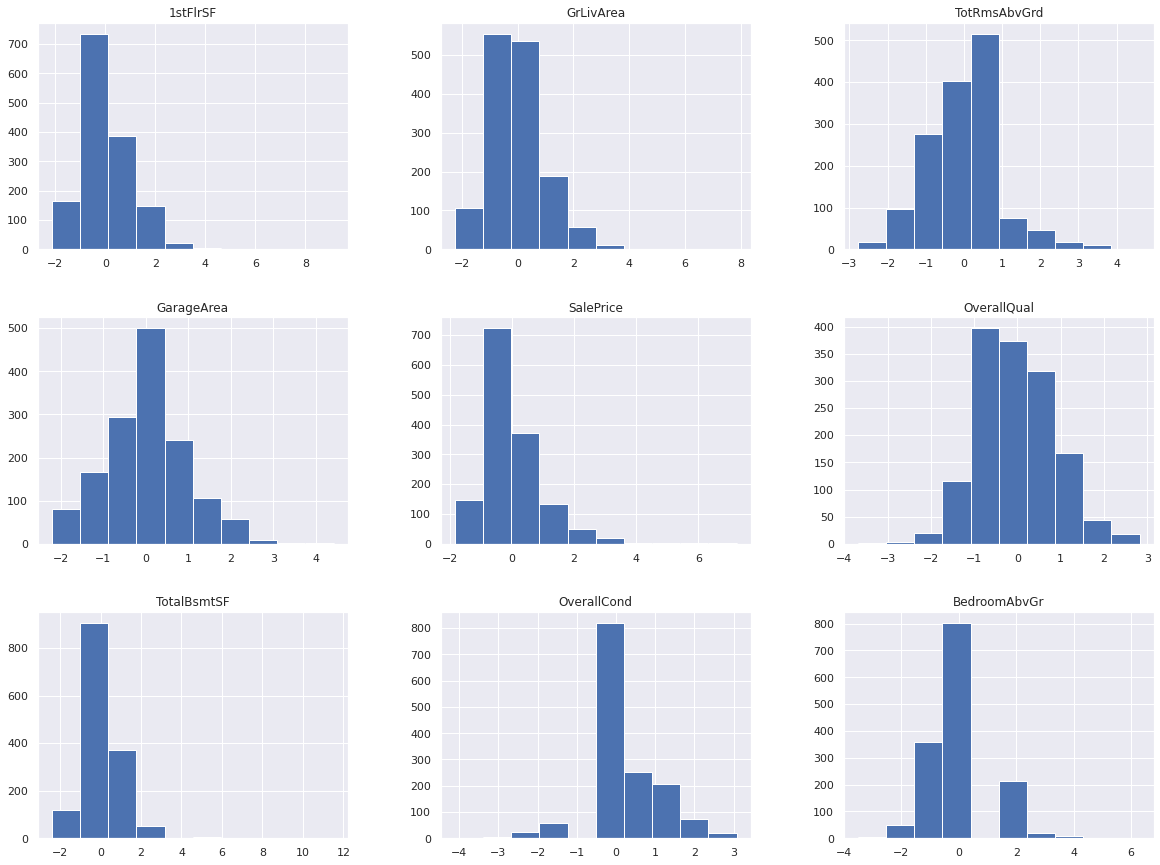

In [70]:
df_ic[to_scale].hist(figsize=(20,15))

In [71]:
df_ic[to_scale].var()

1stFlrSF        1.000685
GrLivArea       1.000685
TotRmsAbvGrd    1.000685
GarageArea      1.000685
SalePrice       1.000685
OverallQual     1.000685
TotalBsmtSF     1.000685
OverallCond     1.000685
BedroomAbvGr    1.000685
dtype: float64

In [72]:
df_ic[to_scale].mean()

1stFlrSF        7.686013e-17
GrLivArea      -1.446332e-16
TotRmsAbvGrd    4.387662e-17
GarageArea     -2.022735e-17
SalePrice       1.180182e-16
OverallQual    -7.680310e-17
TotalBsmtSF     2.063038e-16
OverallCond     3.692632e-16
BedroomAbvGr   -1.108892e-16
dtype: float64

Looking up on the results of the scaling we see that something went wrong, especially in the concern of the mean. Why it is not zero?


Let's check if the same situation we'll encounter in the df with dropped columns. 

In [73]:
_ = ss.fit(df_dc[to_scale])

In [74]:
df_dc[to_scale] = pd.DataFrame(ss.transform(df_dc[to_scale]), columns=to_scale)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af4126bd0>,
      dtype=object)

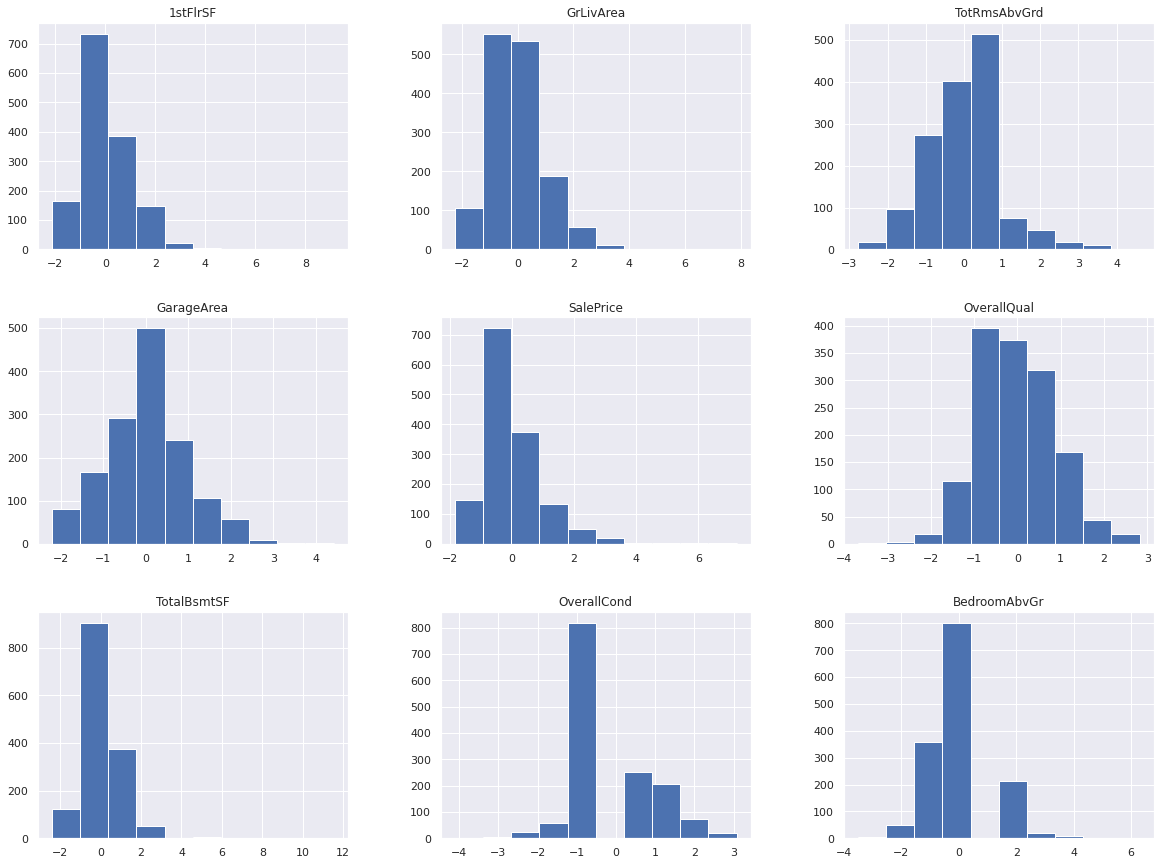

In [75]:
df_dc[to_scale].hist(figsize=(20,15))

In [77]:
df_dc[to_scale].var()

1stFlrSF        1.000962
GrLivArea       1.000317
TotRmsAbvGrd    1.000774
GarageArea      1.000253
SalePrice       0.999741
OverallQual     0.997920
TotalBsmtSF     1.001238
OverallCond     0.997692
BedroomAbvGr    1.000598
dtype: float64

In [78]:
df_dc[to_scale].mean()

1stFlrSF        0.000531
GrLivArea       0.000850
TotRmsAbvGrd    0.000640
GarageArea      0.000876
SalePrice       0.001057
OverallQual     0.001538
TotalBsmtSF     0.000303
OverallCond     0.001588
BedroomAbvGr    0.000728
dtype: float64

Intesting... The result are quite different. 

According to what I've found out StandardScaler is trying to scale mean and variance to 0 and 1, but it sometimes will not succed in this. 

Why? I need to do more research on it. 